In [1]:
import sparkmobility as sm
from sparkmobility.datatset import MobilityDataset
from sparkmobility.processing.stay_detection import StayDetection
from sparkmobility.processing.user_selection import UserSelection
sm.config['CORES'] = 48
sm.config['MEMORY'] = 512
sm.config['LOG_LEVEL'] = 'ERROR'

Spark already installed.
Environment variables set for current session.
To make this persistent, add the following to your shell config (e.g., .bashrc):
export SPARK_HOME="/home/albert/.spark/spark-3.5.5-bin-hadoop3-scala2.13"
export PATH="$SPARK_HOME/bin:$PATH"


## Stay detection

In [ ]:
longitude = [-118.9448, -117.6463]
latitude = [33.7037, 34.3373]

input_path = "/home/albert/raw_data/"
output_path = "/data_1/albert/package_testing/jss_test_results/"

columns = {
    "caid": "caid",
    "latitude": "latitude",
    "longitude": "longitude",
    "utc_timestamp": "utc_timestamp"
}

myDataset = MobilityDataset(
    dataset_name="Veraset20190101",
    raw_data_path=input_path,
    processed_data_path=output_path,
    column_mappings=columns,
    start_datetime="2019-01-01 00:00:00",
    end_datetime="2025-01-31 23:59:59",
    longitude=longitude,
    latitude=latitude,
)

stays = StayDetection(MobilityDataset=myDataset)
stays.get_stays(hexResolution=10)
stays.get_home_work_od_matrix(7)
stays.summarize()

## User selection based on active timespan and number of stay points

Config({'CORES': 48, 'MEMORY': 512, 'LOG_LEVEL': 'ERROR', 'SPARKMOBILITY_JAR': '/data_1/albert/sparkmobility-testing/sparkmobility/lib/sparkmobility010.jar', 'TEMP_DIR': PosixPath('/data_1/albert/sparkmobility-testing/tmp')})


Total users: 2266972
Filtered users: 185689 
 Saved to: /data_1/albert/package_testing/jss_test_results//FilteredUserStayPoints


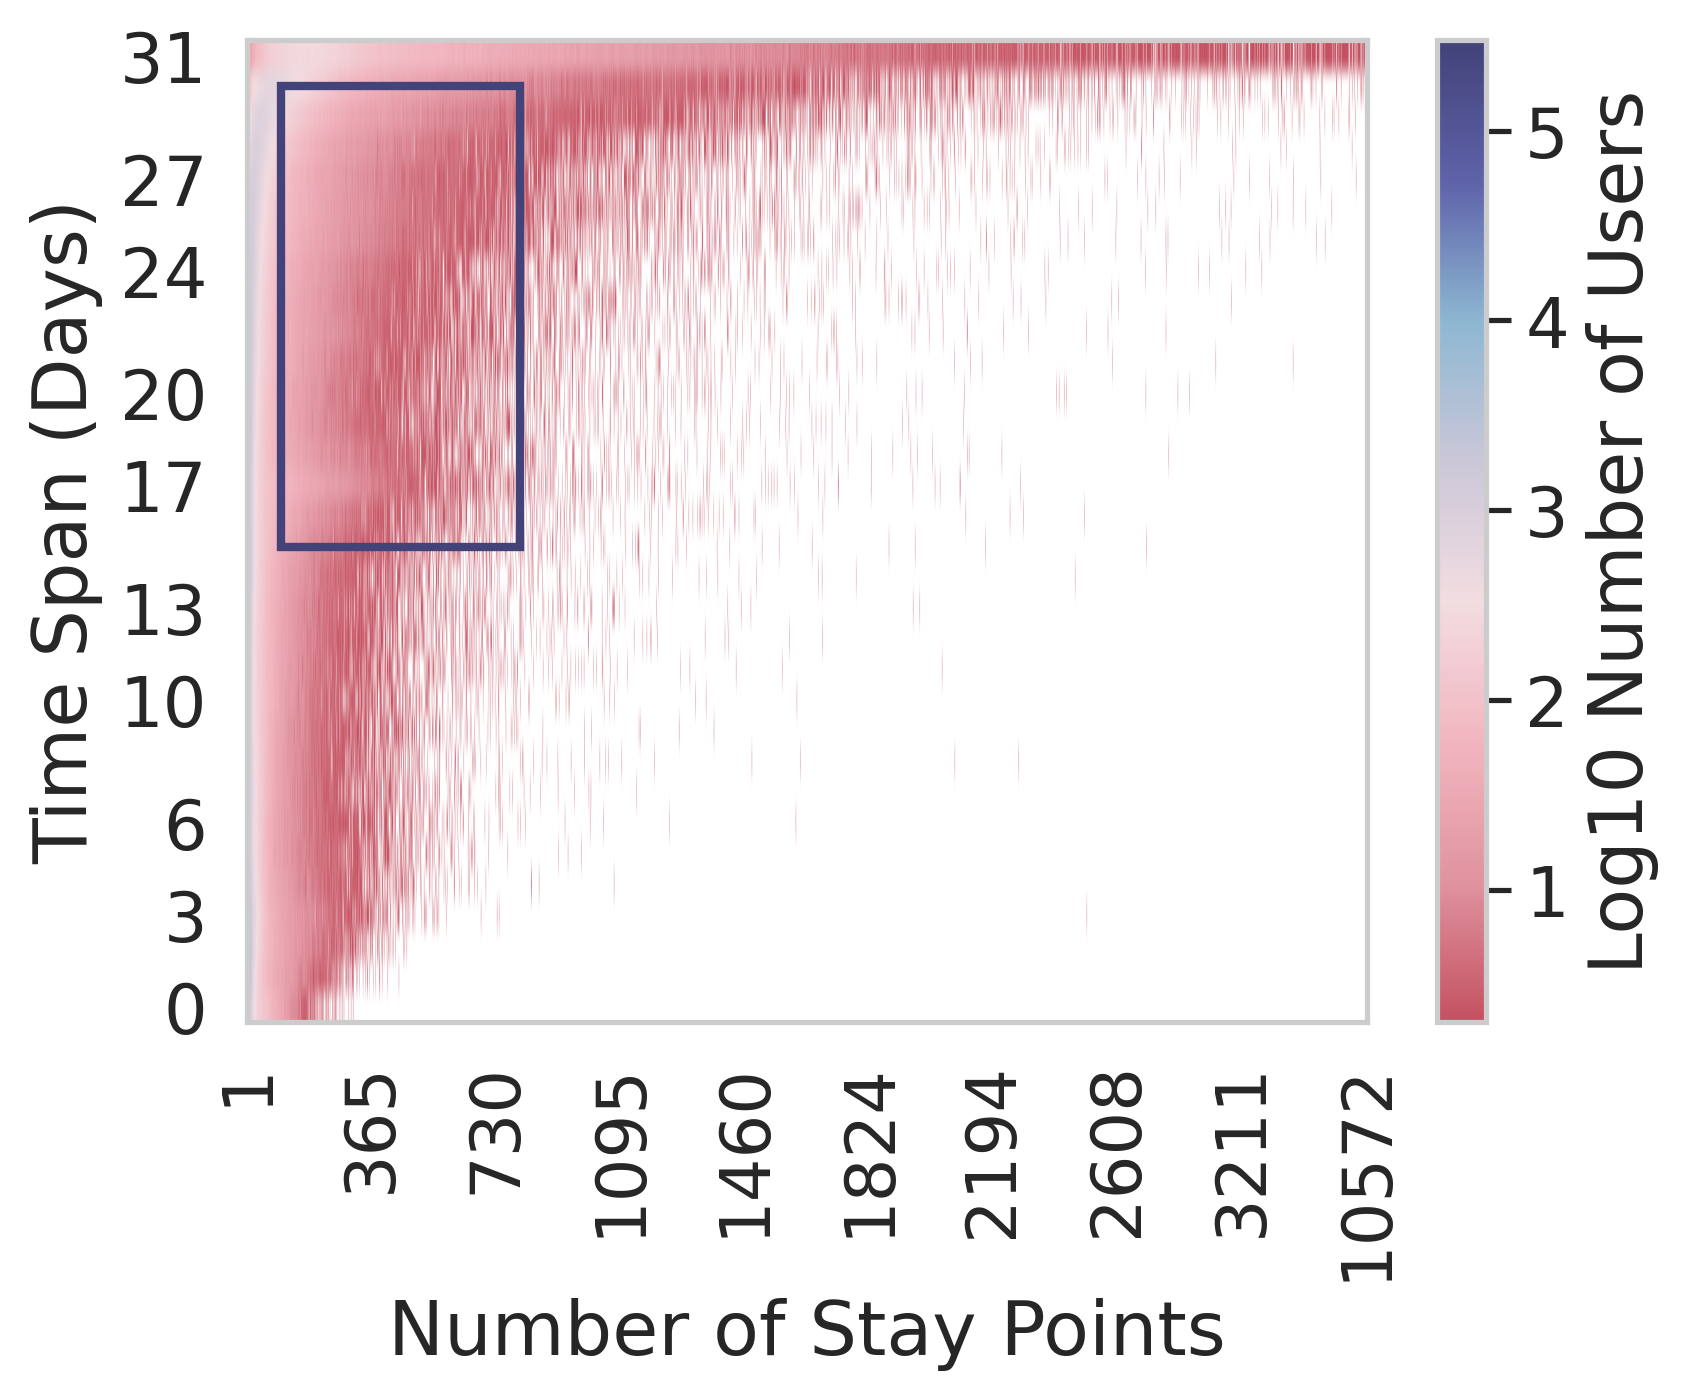

In [8]:
user_selection = UserSelection(myDataset)
fig, ax = user_selection.filter_users(num_stay_points_range=[100,800], time_span_days_range=[15,30])

## Visualization

In [12]:
import pyspark.sql.functions as F

# Plot individual trajectories
from sparkmobility.visualization.individual import plot_trajectories
dl = myDataset.load_stays()
dl = dl.filter(F.col("caid")=="0006e4cac5385960141fee505fbb73922c27309b34c45a8c5bb0bf03ace2879c").toPandas()
plot_trajectories(dl)

Config({'CORES': 48, 'MEMORY': 512, 'LOG_LEVEL': 'ERROR', 'SPARKMOBILITY_JAR': '/data_1/albert/sparkmobility-testing/sparkmobility/lib/sparkmobility010.jar', 'TEMP_DIR': PosixPath('/data_1/albert/sparkmobility-testing/tmp')})


Config({'CORES': 48, 'MEMORY': 512, 'LOG_LEVEL': 'ERROR', 'SPARKMOBILITY_JAR': '/data_1/albert/sparkmobility-testing/sparkmobility/lib/sparkmobility010.jar', 'TEMP_DIR': '/data_jbod/personal/albert/tmp'})
Config({'CORES': 48, 'MEMORY': 512, 'LOG_LEVEL': 'ERROR', 'SPARKMOBILITY_JAR': '/data_1/albert/sparkmobility-testing/sparkmobility/lib/sparkmobility010.jar', 'TEMP_DIR': '/data_jbod/personal/albert/tmp'})
Config({'CORES': 48, 'MEMORY': 512, 'LOG_LEVEL': 'ERROR', 'SPARKMOBILITY_JAR': '/data_1/albert/sparkmobility-testing/sparkmobility/lib/sparkmobility010.jar', 'TEMP_DIR': '/data_jbod/personal/albert/tmp'})


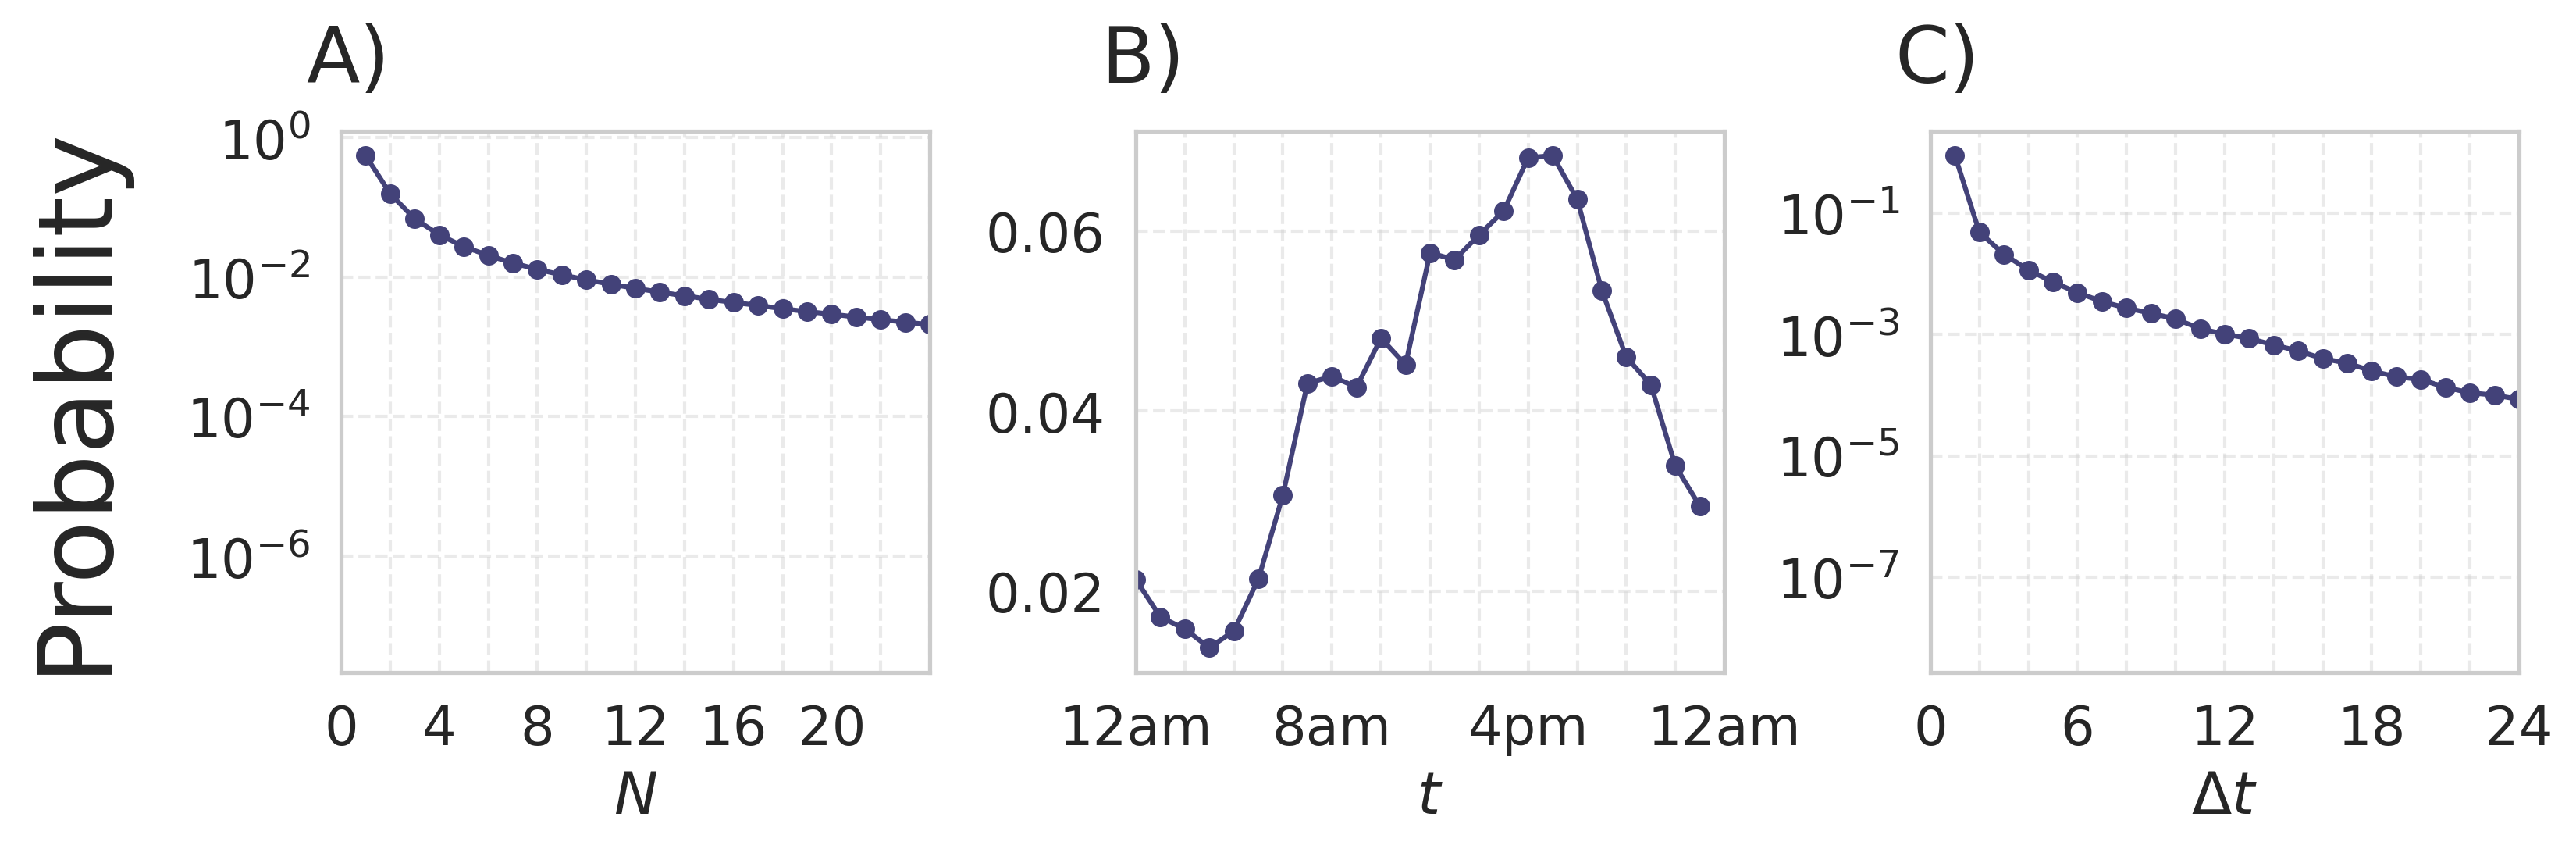

In [ ]:
# Plot mobility distributions
from sparkmobility.visualization.population import plot_mobility_distributions
fig, ax = plot_mobility_distributions(myDataset)

In [3]:
# Plot home location distribution
from sparkmobility.visualization.population import plot_count

df = myDataset.load_stays()
home_loc = df.groupBy("caid").agg({"home_h3_index": "first"}).withColumnRenamed("first(home_h3_index)", "home_h3_index")
home_pd = home_loc.groupBy("home_h3_index").count().toPandas()

home_pd = home_pd.dropna()
home_pd = home_pd[home_pd['home_h3_index']!='None'].reset_index(drop=True)

plot_count(home_pd, "home_h3_index", 6)

Config({'CORES': 48, 'MEMORY': 512, 'LOG_LEVEL': 'ERROR', 'SPARKMOBILITY_JAR': '/data_1/albert/sparkmobility-testing/sparkmobility/lib/sparkmobility010.jar', 'TEMP_DIR': PosixPath('/data_1/albert/sparkmobility-testing/tmp')})


25/11/10 12:44:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/10 12:44:53 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).
